In [1]:
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt 

In [2]:
img=rasterio.open('../Datas/GRAY_HR_SR_OB.tif')

In [3]:
img

<open DatasetReader name='../Datas/GRAY_HR_SR_OB.tif' mode='r'>

In [4]:
img.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 21600,
 'height': 10800,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.01666666666667, 0.0, -180.0,
        0.0, -0.01666666666667, 90.00000000000001)}

In [5]:
Image_arr=img.read()

In [6]:
np.shape(Image_arr)

(1, 10800, 21600)

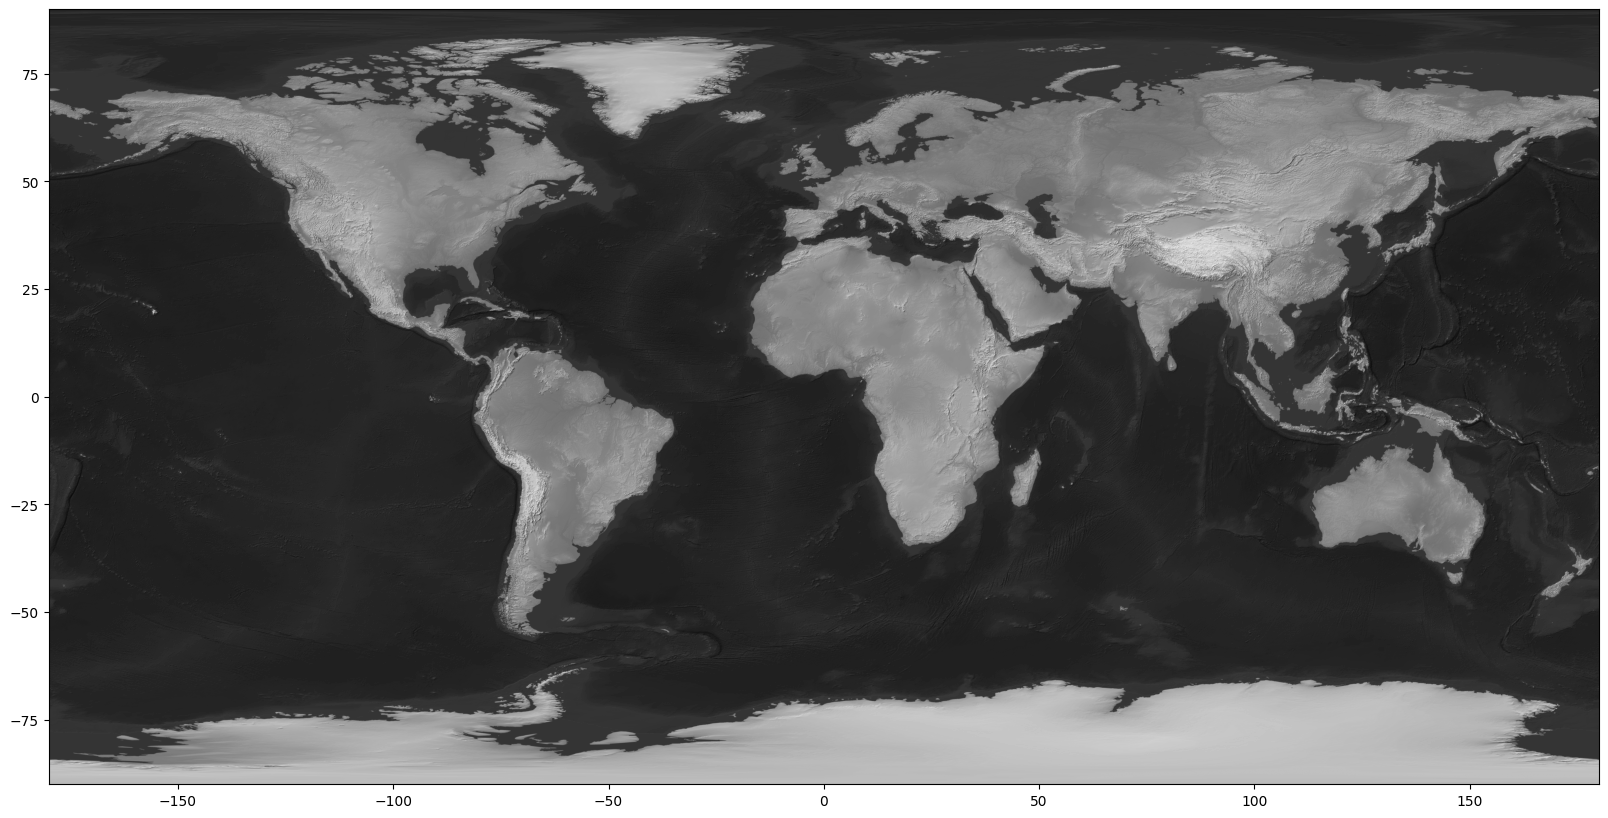

In [7]:
plt.figure(figsize=(20,20))
show(img,cmap='gray')
plt.show()

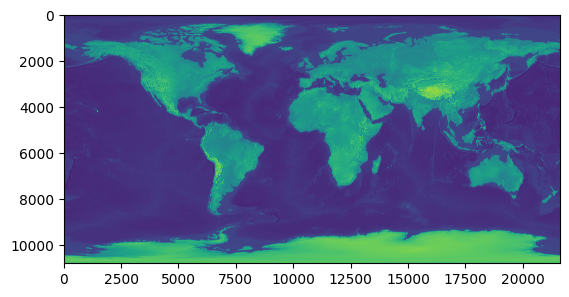

In [8]:
plt.imshow(Image_arr[0])

In [9]:
Image_arr[0]

array([[ 61,  61,  61, ...,  61,  61,  61],
       [ 88,  88,  88, ...,  88,  88,  88],
       [ 88,  88,  88, ...,  88,  88,  88],
       ...,
       [203, 203, 203, ..., 202, 203, 203],
       [202, 202, 203, ..., 203, 202, 203],
       [203, 202, 203, ..., 202, 203, 202]], dtype=uint8)

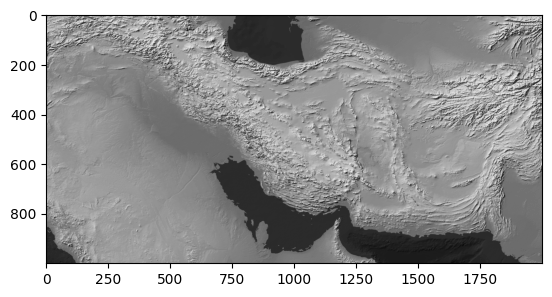

In [10]:
plt.imshow(Image_arr[0][3000:4000,13000:15000],cmap='gray')

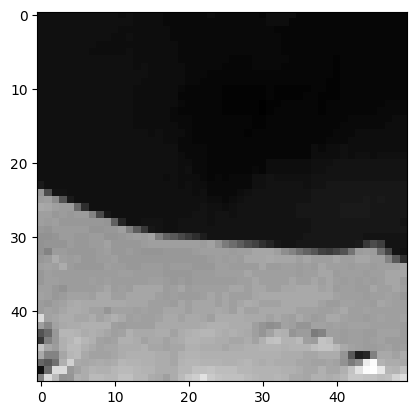

In [28]:
plt.imshow(Image_arr[0][3120:3170, 13750:13800], cmap='gray')

In [32]:
hormoz_img = Image_arr[0][3120:3170, 13750:13800]
np.shape(hormoz_img)

(50, 50)

In [50]:
X = []
for i in range(0, hormoz_img.shape[0]):
    for j in range(0, hormoz_img.shape[1]):
        if i == 0 or j == 0 or i == hormoz_img.shape[0] - 1 or j == hormoz_img.shape[1] - 1:
            p = abs(hormoz_img[i][j])
            X.append([
                p, p, p, p, p, p, p, p, p
            ])
        else:
            f1 = abs(hormoz_img[i][j])
            f2 = abs(hormoz_img[i][j] - hormoz_img[i - 1][j])
            f3 = abs(hormoz_img[i][j] - hormoz_img[i + 1][j])
            f4 = abs(hormoz_img[i][j] - hormoz_img[i][j + 1])
            f5 = abs(hormoz_img[i][j] - hormoz_img[i][j - 1])
            f6 = abs(hormoz_img[i][j] - hormoz_img[i - 1][j + 1])
            f7 = abs(hormoz_img[i][j] - hormoz_img[i - 1][j - 1])
            f8 = abs(hormoz_img[i][j] - hormoz_img[i + 1][j - 1])
            f9 = abs(hormoz_img[i][j] - hormoz_img[i + 1][j + 1])
            X.append([
                f1, f2, f3, f4, f5, f6, f7, f8, f9
            ])
        

C:\Users\hp\AppData\Local\Temp\ipykernel_11640\2957455653.py:14: RuntimeWarning: overflow encountered in ubyte_scalars
  f5 = abs(hormoz_img[i][j] - hormoz_img[i][j - 1])
C:\Users\hp\AppData\Local\Temp\ipykernel_11640\2957455653.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  f7 = abs(hormoz_img[i][j] - hormoz_img[i - 1][j - 1])
C:\Users\hp\AppData\Local\Temp\ipykernel_11640\2957455653.py:12: RuntimeWarning: overflow encountered in ubyte_scalars
  f3 = abs(hormoz_img[i][j] - hormoz_img[i + 1][j])
C:\Users\hp\AppData\Local\Temp\ipykernel_11640\2957455653.py:17: RuntimeWarning: overflow encountered in ubyte_scalars
  f8 = abs(hormoz_img[i][j] - hormoz_img[i + 1][j - 1])
C:\Users\hp\AppData\Local\Temp\ipykernel_11640\2957455653.py:15: RuntimeWarning: overflow encountered in ubyte_scalars
  f6 = abs(hormoz_img[i][j] - hormoz_img[i - 1][j + 1])
C:\Users\hp\AppData\Local\Temp\ipykernel_11640\2957455653.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  f2 = abs(hor

In [53]:
X=np.asmatrix(X)

In [56]:
X.shape

(2500, 9)

In [57]:
from sklearn.cluster import MeanShift

In [59]:
msh=MeanShift(n_jobs=-1)
msh.fit(X)

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


MeanShift(n_jobs=-1)

In [61]:
labels = msh.labels_

In [62]:
np.unique(labels, return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169], dtype=int64),
 array([1157,  196,   9

In [63]:
labels_im = np.full(hormoz_image.shape, -1.)

In [64]:
hormoz_cls = hormoz_img.astype(bool)
labels_im[hormoz_cls] = labels

In [65]:
hormoz_cls

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [66]:
labels_im

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  0.,  0., ...,  0.,  0.,  1.],
       [ 1.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 1., 16., 13., ...,  3.,  2.,  1.],
       [ 1.,  4.,  0., ...,  3., 17.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])

In [67]:
hormoz_img

array([[101, 101, 101, ...,  98,  98,  98],
       [101, 101, 101, ...,  98,  98,  98],
       [101, 101, 101, ...,  98,  98,  98],
       ...,
       [127, 123, 130, ..., 148, 148, 147],
       [101, 129, 162, ..., 151, 150, 154],
       [135, 162, 152, ..., 154, 160, 163]], dtype=uint8)

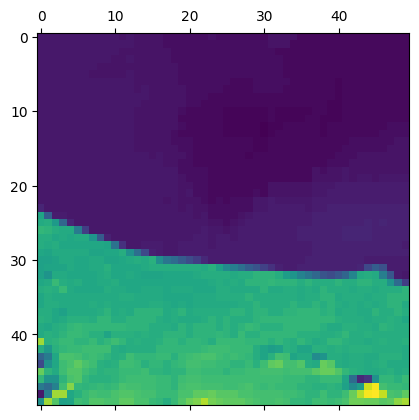

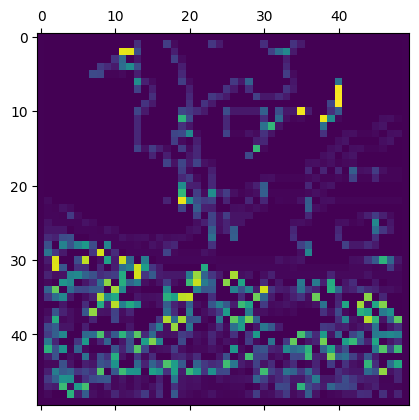

In [68]:
plt.matshow(hormoz_image)
plt.matshow(labels_im)

In [69]:
from sklearn.cluster import KMeans

In [71]:
kms=KMeans(n_clusters=4)
kms.fit(X)

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


KMeans(n_clusters=4)

In [72]:
labelskms = kms.labels_

In [76]:
labels_kmsim = np.full(hormoz_image.shape, -1.)

In [77]:
hormoz_cls = hormoz_img.astype(bool)
labels_kmsim[hormoz_cls] = labelskms

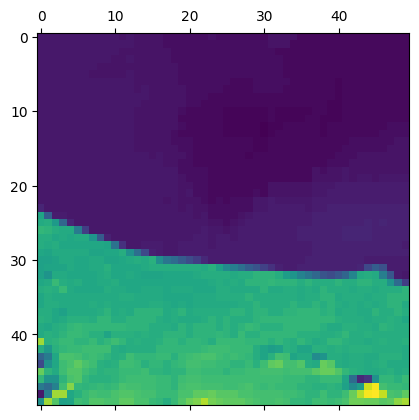

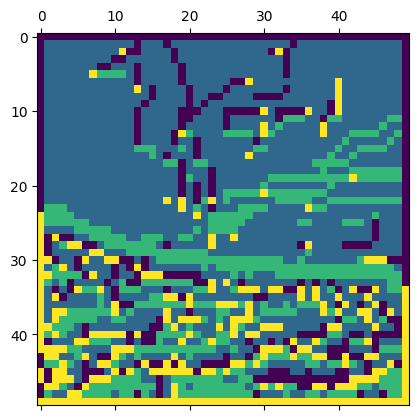

In [79]:
plt.matshow(hormoz_img)
plt.matshow(labels_kmsim)